In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook

In [3]:
import os
import pynterpred as pnt
from simtk import unit

In [4]:
pdb_file = os.path.join(pnt.utils.test_systems_path,'Barnase-Barstar/pdbs/Barnase.pdb')
Receptor = pnt.Receptor(pdb_file,'amber14-all.xml',pH=7.0)

pdb_file = os.path.join(pnt.utils.test_systems_path,'Barnase-Barstar/pdbs/Barstar.pdb')
Ligand = pnt.Ligand(pdb_file,'amber14-all.xml',pH=7.0)

In [5]:
Region = pnt.Region()

In [6]:
Receptor.center()

In [7]:
Receptor.get_view()

NGLWidget()

In [8]:
Region.centers_in_layer("regular_cartesian",Receptor,Ligand,delta_x=0.25*unit.nanometer)

In [9]:
Region.centers

Quantity(value=array([[-1.25,  0.75, -4.5 ],
       [-2.5 ,  0.  , -4.  ],
       [-1.75,  1.  , -4.25],
       ...,
       [ 1.25,  1.  , -1.5 ],
       [-0.5 ,  2.  , -0.75],
       [-0.25,  2.  , -0.75]]), unit=nanometer)

In [10]:
Region.num_centers

12492

In [11]:
import mdtraj
import nglview
import numpy as np

topol=mdtraj.Topology.from_openmm(Receptor.topology)
chain=topol.add_chain()
residue=topol.add_residue('XXX',chain)
for ii in range(Region.num_centers):
    atom=topol.add_atom('C',mdtraj.element.Element,residue)
    atom.element.symbol='C'
    atom.element.radius=0.5

posit = np.vstack((Receptor.positions,Region.centers))

aux_traj=mdtraj.Trajectory(posit, topol)

view=nglview.show_mdtraj(aux_traj)
view.clear()
view.add_cartoon('protein',color='purple')
view.add_surface('protein',color='orange',opacity=0.1)
view.add_ball_and_stick('XXX')
view

NGLWidget()

In [12]:
Region.rotations_in_quaternions_region(nside=8)

In [13]:
Region.rotations

array([quaternion(0.922675780166181, -0.0195287321314864, 0.0471465299677857, 0.382184821818009),
       quaternion(0.382184821818009, -0.0471465299677857, 0.0195287321314864, 0.922675780166181),
       quaternion(-0.382184821818008, -0.0471465299677857, -0.0195287321314864, 0.922675780166181),
       quaternion(-0.922675780166181, -0.0195287321314864, -0.0471465299677857, 0.382184821818009),
       quaternion(0.975663651243166, -0.0199113226122822, 0.100100978509185, 0.194071566635059),
       quaternion(0.827127704754417, -0.0567026494657157, 0.0848615119487913, 0.552669063148122),
       quaternion(0.552669063148122, -0.0848615119487913, 0.0567026494657157, 0.827127704754417),
       quaternion(0.194071566635059, -0.100100978509185, 0.0199113226122822, 0.975663651243166),
       quaternion(-0.194071566635059, -0.100100978509185, -0.0199113226122822, 0.975663651243166),
       quaternion(-0.552669063148122, -0.0848615119487914, -0.0567026494657157, 0.827127704754417),
       quaterni

In [14]:
Region.num_rotations

768

<IPython.core.display.Javascript object>


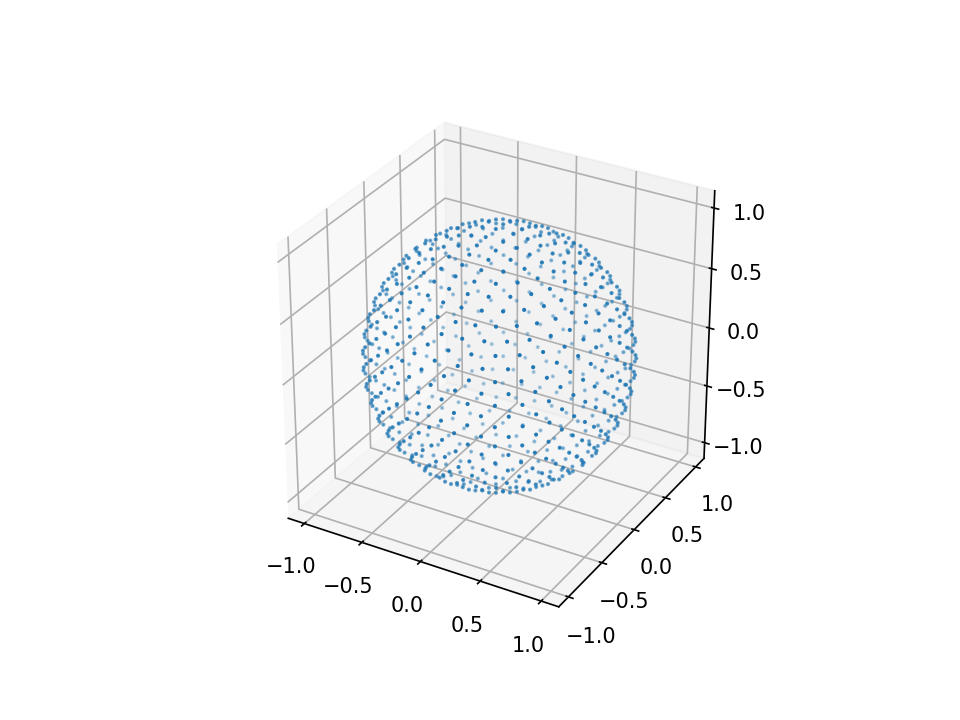

In [15]:
import quaternion
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

vectores_rot=quaternion.rotate_vectors(Region.rotations,(0.0,0.0,1.0))
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')
ax.scatter(vectores_rot[:,0],vectores_rot[:,1],vectores_rot[:,2],s=1.0)

In [16]:
print(Region.num_centers*Region.num_rotations)

9593856


## Centers and rotations can be used as rigid conformational set for docking sampling 

We can put together what we learnt in this notebook together with 1.2

In [17]:
Complex = pnt.MolComplex(Receptor,Ligand)
MM_Complex = pnt.MMContext(Complex)

In [18]:
Region = pnt.Region(receptor=Receptor, ligand=Ligand, delta_x=0.6*unit.nanometer, nside=4)

In [19]:
positions=[]

for center in Region.centers[0:20]:
    MM_Complex.center_ligand(center)
    for rotation in Region.rotations:
        MM_Complex.rotate_ligand(rotation)
        positions.append(MM_Complex.get_positions())

In [20]:
view = Complex.get_view(positions)
view

NGLWidget(count=3840)